In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

# generate training and testing data

In [2]:
def gen_data(X):
    y = X[:,0] * np.sin(X[:,0]*10) + 1 + .4 * np.sin(X[:,1])
    y += np.random.uniform(0, 0.1, size=(len(y)))
    return y

In [3]:
# generate some fake data
x = np.linspace(0,1,10)
xx, yy = np.meshgrid(x,x)
xx = xx.ravel()
yy = yy.ravel()
X = np.zeros(shape=(len(xx), 2))
X[:,0] = xx
X[:,1] = yy

y = gen_data(X)

In [4]:
# validation data
# generate some fake data
x = np.linspace(0,1,20)
xx, yy = np.meshgrid(x,x)
xx = xx.ravel()
yy = yy.ravel()
X_val = np.zeros(shape=(len(xx), 2))
X_val[:,0] = xx
X_val[:,1] = yy

y_val = gen_data(X_val)

Text(0.5, 1.0, 'training set')

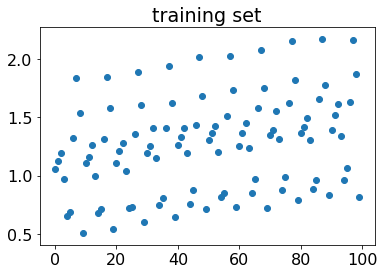

In [5]:
plt.figure()
plt.scatter(range(len(y)), y)
plt.title("training set")

Text(0.5, 1.0, 'validation set')

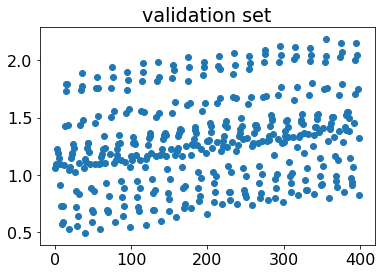

In [6]:
plt.figure()
plt.scatter(range(len(y_val)), y_val)
plt.title("validation set")

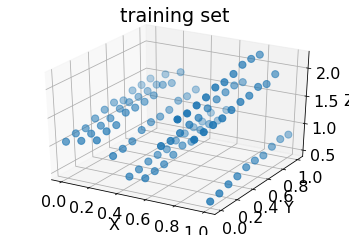

In [7]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X[:,0], X[:,1], y, s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.title("training set")
plt.show()

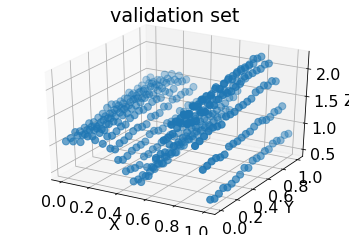

In [8]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X_val[:,0], X_val[:,1], y_val, s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.title("validation set")
plt.show()

# import scrinet and perform fits

In [9]:
from scrinet import fits

In [10]:
dir(fits.nn)

['Activation',
 'Dense',
 'Dropout',
 'ELU',
 'LeakyReLU',
 'ModelCheckpoint',
 'ReLU',
 'RegressionANN',
 'Sequential',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'load_model',
 'np',
 'scale',
 'tensorflow']

In [20]:
def fit_with_nn(X, y, epochs=500, validation_data=None, scaleX=False, scaleY=False):
    fit = fits.nn.RegressionANN()
    history = fit.fit(X, y, input_dim=2, noutput=1, epochs=epochs, validation_data=validation_data, outname='best', scaleX=scaleX, scaleY=scaleY)
    return fit, history

In [32]:
fit, history = fit_with_nn(X, y.reshape(-1,1), epochs=500, scaleX=True, scaleY=False, validation_data=(X_val, y_val.reshape(-1,1)))

In [33]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

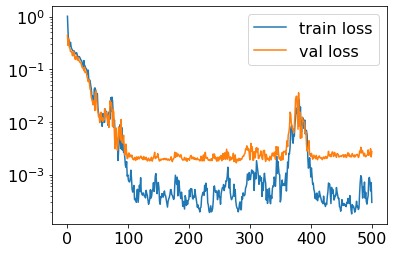

In [34]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')

plt.yscale('log')

plt.legend()
plt.show()

In [35]:
yhat = fit.predict(X)
yhat_val = fit.predict(X_val)

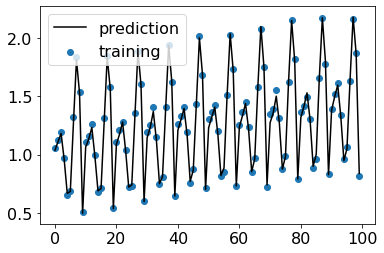

In [36]:
plt.figure()
plt.scatter(range(len(y)), y, label='training')
plt.plot(range(len(y)), yhat, label='prediction', c='k')
plt.legend()

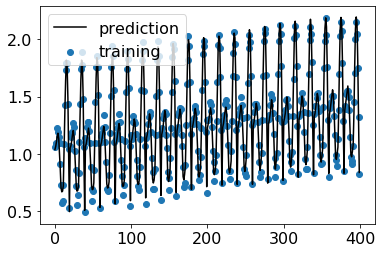

In [37]:
plt.figure()
plt.scatter(range(len(y_val)), y_val, label='training')
plt.plot(range(len(y_val)), yhat_val, label='prediction', c='k')
plt.legend()

Text(0.5, 1.0, 'training set difference')

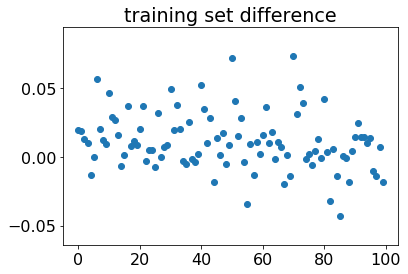

In [38]:
plt.figure()
plt.scatter(range(len(y)), y - yhat.reshape(-1))
plt.title("training set difference")

Text(0.5, 1.0, 'training set difference')

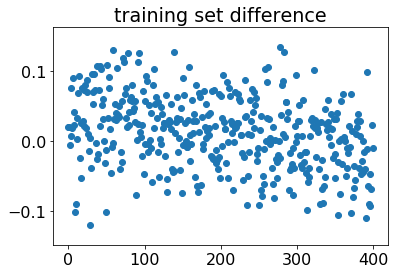

In [39]:
plt.figure()
plt.scatter(range(len(y_val)), y_val - yhat_val.reshape(-1))
plt.title("training set difference")